In [1]:
## 강사님 답안지
## titanic을 같이풀어보자 

#필요한 모듈 불러오기 
import pandas as pd 

# data loading(train data set loading)
train_df = pd.read_csv("./data/titanic/train.csv")

#데이터 확인 
train_df.head()
train_df.shape #(891, 12)
train_df.info() #각 column(feature)의 상세정보를 출력
train_df.isnull().sum(axis=0) #column별 결측값 확인 (N)
'''
결측치와 이상치를 찾아서 적절한 값으로 변경하던지
아니면 삭제하던가 다른 처리를 해야한다.(비추)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\n결측치와 이상치를 찾아서 적절한 값으로 변경하던지\n아니면 삭제하던가 다른 처리를 해야한다.(비추)\n'

In [2]:
# 어떤 feature가 생존여부에 영향을 미치는지 확인
# 그래프로 확인해보자 
# (파이차트, 누적 바차트 많이 사용)
# 성별이 생존여부에 영향을 미치는지 확인해보자
# 생존한 사람의 성별에 따른 사람수를구하자 
survived = train_df.loc[train_df["Survived"]==1]["Sex"].value_counts() 
survived.name = "Survived"
survived
# 사망한 사람의 성별에 따른 사람수를 구해보아요! 
dead = train_df.loc[train_df["Survived"]==0]["Sex"].value_counts()
dead.name = "Dead"
dead

#그래프를 그리기 위해서 데이터 프레임으로 만듥
sex_df = pd.DataFrame([survived,dead])
sex_df
sex_df.plot(kind="bar", stacked=True) #누적 막대 그래프를 그리겠다고 선언 

'''
성별이 생존여부에 영향을 미침(O)
'''


'\n성별이 생존여부에 영향을 미침(O)\n'

'\nPclass가 생존여부에 영향을 미침(O)\n'

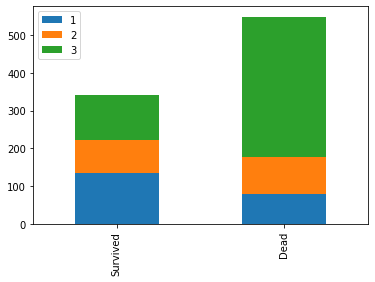

In [3]:
# Pclass이 생존여부에 영향을 미치는지 확인

# 생존한 사람의 Pclass에 따른 사람수를 구해보자 
survived = train_df.loc[train_df["Survived"]==1]["Pclass"].value_counts() 
survived.name = "Survived"
survived

# 사망한 사람의 Pclass에 따른 사람수를 구해보아요! 
dead = train_df.loc[train_df["Survived"]==0]["Pclass"].value_counts()
dead.name = "Dead"
dead

#그래프를 그리기 위해서 데이터 프레임으로 만듥
pclass_df = pd.DataFrame([survived,dead])
pclass_df
pclass_df.plot(kind="bar", stacked=True) #누적 막대 그래프를 그리겠다고 선언 

'''
Pclass가 생존여부에 영향을 미침(O)
'''


In [4]:
#함수를 선언해서 써보자(다른방법)
def stackedBarChart(feature):
    survived = train_df.loc[train_df["Survived"]==1][feature].value_counts() 
    survived.name = "Survived"
    survived
 
    dead = train_df.loc[train_df["Survived"]==0][feature].value_counts()
    dead.name = "Dead"
    dead

    chart_df = pd.DataFrame([survived,dead])
    chart_df.plot(kind="bar", stacked=True) #누적 막대 그래프를 그리겠다고 선언 


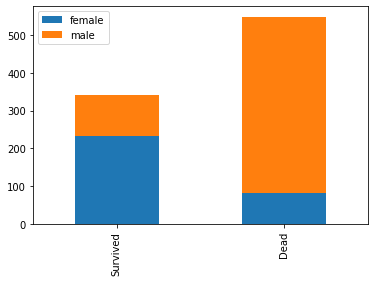

In [5]:
stackedBarChart("Sex")

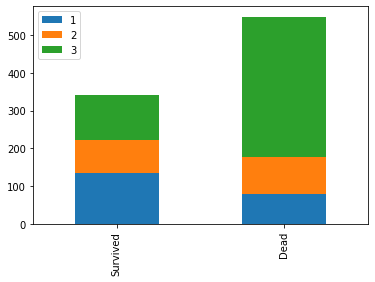

In [6]:
stackedBarChart("Pclass") #매번 복사하여 쓸 필요 없다 

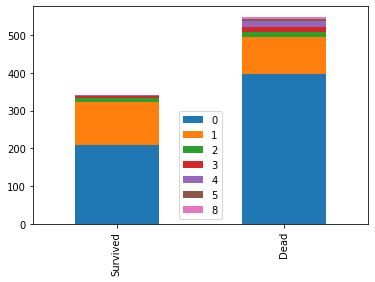

In [7]:
stackedBarChart("SibSp")

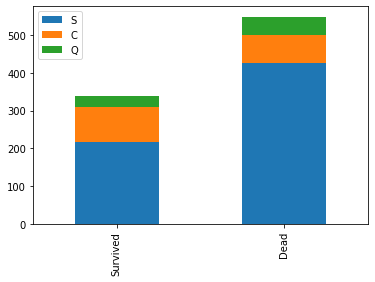

In [8]:
stackedBarChart("Embarked") #놀랍게도 승차 지역도 생존에 영향을 미치고 있다! 

In [9]:
# Feature Engineering
# Feature : Column 
train_df.head()
# text로 되어있는 부분은 machine learning하기가 힘들다 
# text로 되어 있는 부분은 적절한 scale의 숫자로 변환 
# NaN(결측치)는 삭제하는 것 보다는 적절한 값으로 대체 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Mme           1
Sir           1
Lady          1
Don           1
Jonkheer      1
Ms            1
Countess      1
Name: Title, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,2
2,1,3,female,26.0,0,0,7.9250,1
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,3
887,1,1,female,19.0,0,0,30.0000,1
888,0,3,female,NaN,1,2,23.4500,1
889,1,1,male,26.0,0,0,30.0000,0


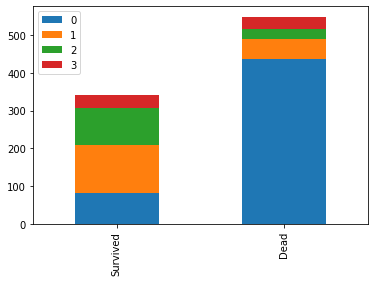

In [10]:
# 제일먼저 해결해야 하는 feature는 Name 
# Name자체는 그 자체로는 크게 의미가 없어 보이지만 이름의 특정 keyword가 들어가 있고, 이 keyword가 
# 생존에 영향을 미칠 수 있다., 
train_df["Title"]= train_df["Name"].str.extract("([A-Za-z]+)\.") #영문자, 대소문자 한 다음에 . 이 나오는 형태만 뽑아라
                                              # (Mr. Mrs. Miss. Rev. ...)
print(train_df["Title"].value_counts()) #Title 컬럼에 대해서 몇 개 있는지 출력 

#Title안에 Mr. Miss Mrs. Other를 각각 0,1,2,3으로 변환 (Series의 map 이용)
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Jonkheer" :3, "Countess" :3,
                      "Lady" :3, "Mme" :3, "Ms" :3,
                      "Sir" :3, "Capt" :3} #mapping되는 형태를 dict 형식으로 선언
train_df["Title"]=train_df["Title"].map(title_mapping_dict)
train_df #출력 확인(컬럼생성여부)
stackedBarChart("Title") # Mr. 가 압도적으로 많이 죽은것을 확인 

#제거할 건 제거하자(너무 결측치가 많거나 상관없어 보인다)
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("Ticket", axis=1, inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
train_df.drop("PassengerId", axis=1, inplace=True)
#train_df.drop("Embarked", axis=1, inplace=True)
train_df

In [11]:
#train 데이터를 좀더 수정해보자 

# 성별 col에 대해 male=0, female=1로 수정해보자 
sex_mapping_dict = {'male': 0, 'female':1}
train_df["Sex"]=train_df["Sex"].map(sex_mapping_dict)




In [12]:
 
#탑승지역의 결측치를 "S"로 대체 (그냥 S에서 가장많이 타서..)
train_df["Embarked"].fillna("S", inplace=True)
# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 
embarked_mapping_dict = {'S': 0, 'Q': 1, 'C': 2} #linear처럼 가중치를 크게 생각하지 않고 그냥 나눠준다고(구분) 생각 
train_df["Embarked"]=train_df["Embarked"].map(embarked_mapping_dict)
display(train_df)
display(stackedBarChart("Embarked"))


'제외시도 \n#탑승지역의 결측치를 "S"로 대체 (그냥 S에서 가장많이 타서..)\ntrain_df["Embarked"].fillna("S", inplace=True)\n# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 \nembarked_mapping_dict = {\'S\': 0, \'Q\': 1, \'C\': 2} #linear처럼 가중치를 크게 생각하지 않고 그냥 나눠준다고(구분) 생각 \ntrain_df["Embarked"]=train_df["Embarked"].map(embarked_mapping_dict)\ndisplay(train_df)\ndisplay(stackedBarChart("Embarked"))\n'

In [13]:
# Age에는 결측치가 많다. 
# 가능한한 타당한 이유로 결측치를 다른 값으로 대체해 주어야 한다. 
# -전체사람의 평균을 구해서 결측치를 채운다. 
# -Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다. 
age_mean = train_df.groupby("Title")["Age"].mean()
a = train_df[train_df["Title"]==0]["Age"].fillna(age_mean[0]) #series를 return 받는다
b = train_df[train_df["Title"]==1]["Age"].fillna(age_mean[1])
c = train_df[train_df["Title"]==2]["Age"].fillna(age_mean[2])
d = train_df[train_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
train_df["Age"]=result_series.sort_index()
display(train_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,2
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,3
887,1,1,1,19.000000,0,0,30.0000,1
888,0,3,1,21.773973,1,2,23.4500,1
889,1,1,0,26.000000,0,0,30.0000,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,1.0,1,0,7.2500,0
1,1,1,1,1.0,1,0,71.2833,2
2,1,3,1,1.0,0,0,7.9250,1
3,1,1,1,1.0,1,0,53.1000,2
4,0,3,0,1.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,3
887,1,1,1,0.0,0,0,30.0000,1
888,0,3,1,1.0,1,2,23.4500,1
889,1,1,0,1.0,0,0,30.0000,0


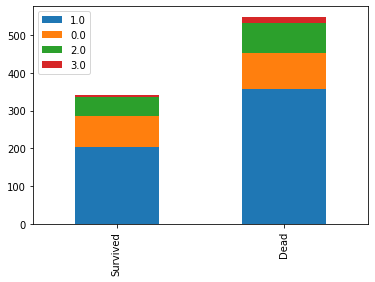

In [14]:
# Age에 대해서 Binning 처리 
# Binning 처리를 할 때 고려해야 할 사항 -> 간격은 어떻게 설정? 
# Age -> 0~20 :0 
# Age -> 20살 초과~40이하 : 1
# Age -> 40살 초과~60이하 : 2
# Age -> 60살초과 : 3
train_df.loc[train_df["Age"] <= 20, "Age"] = 0
train_df.loc[(train_df["Age"] > 20) & (train_df["Age"] <= 40), "Age"] = 1
train_df.loc[(train_df["Age"] > 40) & (train_df["Age"] <= 60), "Age"] = 2
train_df.loc[60 < train_df["Age"] , "Age"] = 3

stackedBarChart("Age") # 20대~40대 인원들이 가장 많이 죽음(원래 구성비율자체가 높음)
display(train_df) # 이 셀만 다시 실행하면 다 꼬인다!! 재실행시 유의할 것
                  # 운임요금(Fare) 를 마지막 binning 처리 대상으로! 

512.3292
0.0
7.9104
14.4542
31.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,1.0,1,0,3.0,2
2,1,3,1,1.0,0,0,1.0,1
3,1,1,1,1.0,1,0,3.0,2
4,0,3,0,1.0,0,0,1.0,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,3
887,1,1,1,0.0,0,0,2.0,1
888,0,3,1,1.0,1,2,2.0,1
889,1,1,0,1.0,0,0,2.0,0


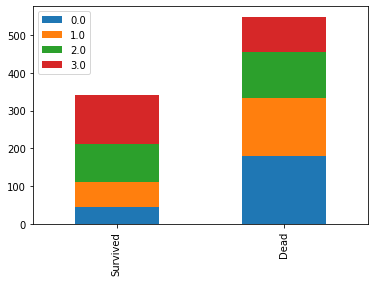

In [15]:
# Fare까지 Binning 처리를 해 보자. 
# 여기에 이상치 처리까지하면 모든 전처리가 끝이난다! 
import numpy as np 

print(max(train_df["Fare"])) #512.3292
print(min(train_df["Fare"])) #0.0
print(np.percentile((train_df["Fare"]), 25)) #7.9104
print(np.percentile((train_df["Fare"]), 50)) #14.4542
print(np.percentile((train_df["Fare"]), 75)) #31.0

train_df.loc[train_df["Fare"] <= 7.9104, "Fare"] = 0
train_df.loc[(train_df["Fare"] > 7.9104) & (train_df["Fare"] <= 14.4542), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 14.4542) & (train_df["Fare"] <= 31.0), "Fare"] = 2
train_df.loc[31.0 < train_df["Fare"] , "Fare"] = 3

display(train_df)
stackedBarChart("Fare")

In [16]:
# Machine Learing으로 들어가요 
# Logistic regression 을 Tensorflow를 이용해서 구현해 보아요 
import tensorflow as tf
# data set을 준비해야 해요 
# 정확도를 측정하기 위해서 학습용 데이터와 평가용 데이터를 따로 분리해야 한다. (지금은 데이터 set이 하나)
# train_df를 살짝 분리해서 학습용 데이터와 평가용 데이터를 생성해보자(7:3, 8:2 ...)
'''
데이터 편향을 방지하기 위한 'n fold Cross validation' 방식 등장 
데이터 분할 및 평가 위치를 n번 바꾸어(=정확도를 10번 측정해) 결과를 찾음 
''' 
# 이번에는 그냥 위에서 80%를 학습용 데이터로 하위 20% 평가용 데이터로 사용하기로 함. 
train_df.shape
train_num = int(train_df.shape[0] * 0.8) #712
#test_num = train_df.shape[0] - train_num (이건 지금 쓰지말자)

#train, test data set 
train_x_data = train_df.drop("Survived", axis = 1, inplace = False)[:train_num] #survive column 제외하기
                                                                 #이거를 inclusive니 711번째 행까지 나올것
test_x_data = train_df.drop("Survived", axis=1, inplace=False)[train_num:] #아까거 반대로 

# y축은 Survived 하나 
# 차원 형태를 바꾸어주어야 한다.
train_y_data = train_df["Survived"][:train_num].values.reshape([-1,1]) #2차원 형태의 numpy array로 
test_y_data = train_df["Survived"][train_num:].values.reshape([-1,1])


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

In [17]:
# tensorflow를 이용한 logistic regression code가 나오면된다
# placeholder 
X = tf.placeholder(shape=[None,8], dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

# Weight, bias 
W = tf.Variable(tf.random_normal([8,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "weight")

# Hypothesis 
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost(Loss) function 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))

#train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습 
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict={ X : train_x_data, 
                                                      Y : train_y_data})
    if step % 3000 == 0:
        print("Cost값은 : {}".format(cost_val))
    
# 정확도 측정 
# 테스트용 입력 데이터를(test_x_data) 넣어서 예측한다 .
# 이렇게 구한 예측값과 y입력데이터(test_y_data)를 비교한다.
# 예측값과 실제 데이터의 차이를 비율로 계산해보아요. 
predict = tf.cast(H > 0.5, dtype = tf.float32) # 이론의 0.5가 넘으면 산것으로 간주 
                                               # T, F 를 실수값으로 casting
                                               # 확률을 0 과 1로 분류한다. 
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32)) 
print("정확도 : {}.".format(sess.run(accuracy, feed_dict={ X: test_x_data,
                                                           Y: test_y_data})))


Cost값은 : 1.423419713973999
Cost값은 : 0.45887452363967896
Cost값은 : 0.441579669713974
Cost값은 : 0.4377167522907257
Cost값은 : 0.4366796314716339
Cost값은 : 0.43633511662483215
Cost값은 : 0.43617746233940125
Cost값은 : 0.43607914447784424
Cost값은 : 0.43600592017173767
Cost값은 : 0.4359467327594757
정확도 : 0.8379888534545898.


In [18]:
# Kaggle에서 제공한 test.csv 파일이 있다(유명한 문제다 보니 답지가 있다.)
# test.csv를 이용해서 prediction 을 해야 한다. 
# 예측결과가 나온다! -> 파일로 만들어서 제출 

# test.csv를 살펴보면 train.csv와 같다.(비슷하게 생김)
# 즉, test.csv도 accuracy를 구할 수 있는 형태로 feature engineering 을 해야 한다. 

import tensorflow as tf
import pandas as pd 
import numpy as np 


# data loading(train data set loading)
test_df = pd.read_csv("./data/titanic/test.csv")


# Feature Engineering
# Feature : Column 
test_df.head()

test_df["Title"]= test_df["Name"].str.extract("([A-Za-z]+)\.") 
test_df["Title"].value_counts() 
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Dona" :3, "Jonkheer" :3, 
                      "Countess" :3, "Lady" :3, "Mme" :3,
                      "Ms" :3, "Sir" :3, "Capt" :3} 
test_df["Title"]=test_df["Title"].map(title_mapping_dict) #Dona 추가 

#제거할 건 제거하자(안쓸 col들 제거)
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("PassengerId", axis=1, inplace=True)
#test_df.drop("Embarked", axis=1, inplace=True)
# 성별 col에 대해 male=0, female=1로 수정해보자 
sex_mapping_dict = {'male': 0, 'female':1}
test_df["Sex"]=test_df["Sex"].map(sex_mapping_dict)


# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 
test_df["Embarked"].fillna("S", inplace=True)
embarked_mapping_dict = {'S': 0, 'Q': 1, 'C': 2} 
test_df["Embarked"]=test_df["Embarked"].map(embarked_mapping_dict)


# Age처리 
# -Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다. 
age_mean = test_df.groupby("Title")["Age"].mean()
a = test_df[test_df["Title"]==0]["Age"].fillna(age_mean[0]) #series를 return 받는다
b = test_df[test_df["Title"]==1]["Age"].fillna(age_mean[1])
c = test_df[test_df["Title"]==2]["Age"].fillna(age_mean[2])
d = test_df[test_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
test_df["Age"]=result_series.sort_index()

# Age에 대해서 Binning 처리 
test_df.loc[test_df["Age"] <= 20, "Age"] = 0
test_df.loc[(test_df["Age"] > 20) & (test_df["Age"] <= 40), "Age"] = 1
test_df.loc[(test_df["Age"] > 40) & (test_df["Age"] <= 60), "Age"] = 2
test_df.loc[60 < test_df["Age"] , "Age"] = 3

 
    
# Fare처리
'''
print(max(train_df["Fare"])) #512.3292
print(min(train_df["Fare"])) #0.0
print(np.percentile((train_df["Fare"]), 25)) #7.9104
print(np.percentile((train_df["Fare"]), 50)) #14.4542
print(np.percentile((train_df["Fare"]), 75)) #31.0
'''
test_df["Fare"]=test_df["Fare"].fillna(0)
test_df.loc[test_df["Fare"] <= 7.9104, "Fare"] = 0
test_df.loc[(test_df["Fare"] > 7.9104) & (test_df["Fare"] <= 14.4542), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 14.4542) & (test_df["Fare"] <= 31.0), "Fare"] = 2
test_df.loc[31.0 < test_df["Fare"] , "Fare"] = 3


display(test_df)
#######################################################################


# machine learning 
# test_df 결과 출력하기 

# placeholder 
X = tf.placeholder(shape=[None,8], dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

# Weight, bias 
W = tf.Variable(tf.random_normal([8,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "weight")

# Hypothesis 
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost(Loss) function 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))

#train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습 
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict={ X : train_x_data, 
                                                      Y : train_y_data})
    if step % 3000 == 0:
        print("Cost값은 : {}".format(cost_val))


#예측        
result = sess.run(H, feed_dict={X : test_df})
predict = tf.cast(result > 0.5, dtype = tf.int64)
print(sess.run(predict))


#조건첨가
'''
if result > 0.5:
    result = 1
    print("생존 : {}".format(result))
else:
    result = 0
    print("사망 : {}".format(result))
'''


,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,0,1.0,0,0,0.0,0
1,3,1,2.0,1,0,0.0,2
2,2,0,3.0,0,0,1.0,0
3,3,0,1.0,0,0,1.0,0
4,3,1,1.0,1,1,1.0,2
...,...,...,...,...,...,...,...
413,3,0,1.0,0,0,1.0,0
414,1,1,1.0,0,0,3.0,3
415,3,0,1.0,0,0,0.0,0
416,3,0,1.0,0,0,1.0,0


Cost값은 : 2.2933828830718994
Cost값은 : 0.9016557931900024
Cost값은 : 0.7663416266441345
Cost값은 : 0.6733632683753967
Cost값은 : 0.6078841686248779
Cost값은 : 0.5615565776824951
Cost값은 : 0.5285098552703857
Cost값은 : 0.5047658681869507
Cost값은 : 0.4876052439212799
Cost값은 : 0.47513940930366516
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]

'\nif result > 0.5:\n    result = 1\n    print("생존 : {}".format(result))\nelse:\n    result = 0\n    print("사망 : {}".format(result))\n'

In [19]:
#결과 제출용 파일 생성 

#test_df.isnull().sum()
#결과 제출용 파일 생성 

result_df = pd.DataFrame(sess.run(predict))
result_df.rename(columns={0:"Survived"}, inplace = True)
display(result_df)


df = pd.read_csv("./data/titanic/gender_submission.csv")
submit_df= df["PassengerId"]
submit_df = pd.DataFrame(submit_df)
display(submit_df)


submit_df = pd.concat([submit_df, result_df], axis= 1)
display(submit_df)

submit_df.to_csv("./data/titanic/result.csv", index=False)


'''
submit_df = pd.read_csv("./data/titanic/gender_submission.csv")
display(submit_df)
submit_df= submit_df.drop("Survived", axis=1, inplace=True)
display(submit_df)
'''
#df.to_csv('result.csv')

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


'\nsubmit_df = pd.read_csv("./data/titanic/gender_submission.csv")\ndisplay(submit_df)\nsubmit_df= submit_df.drop("Survived", axis=1, inplace=True)\ndisplay(submit_df)\n'

In [20]:
# 싸이킷 런을 통해 구현해보자 
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
myModel = model.fit(train_x_data,train_y_data) #학습끝!! 
result = myModel.predict(test_df)
display(result)

######결과 저장 

result_df = pd.DataFrame(result)
result_df.rename(columns={0:"Survived"}, inplace = True)
display(result_df)

df = pd.read_csv("./data/titanic/gender_submission.csv")
submit_df= df["PassengerId"]
submit_df = pd.DataFrame(submit_df)
display(submit_df)


submit_df = pd.concat([submit_df, result_df], axis= 1)
display(submit_df)

submit_df.to_csv("./data/titanic/result_sklearn.csv", index=False)

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
